In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
boston = datasets.load_boston()
X = boston.data  # 特徴量
y = boston.target  # 目的変数

/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test)

In [6]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 29.78


In [7]:
print(f"Intercept: {model.intercept_:.2f}")
coefficients = pd.DataFrame(model.coef_, boston.feature_names, columns=['Coefficient'])
print(coefficients)

Intercept: 36.93
         Coefficient
CRIM       -0.117735
ZN          0.044017
INDUS      -0.005768
CHAS        2.393416
NOX       -15.589421
RM          3.768968
AGE        -0.007035
DIS        -1.434956
RAD         0.240081
TAX        -0.011297
PTRATIO    -0.985547
B           0.008444
LSTAT      -0.499117


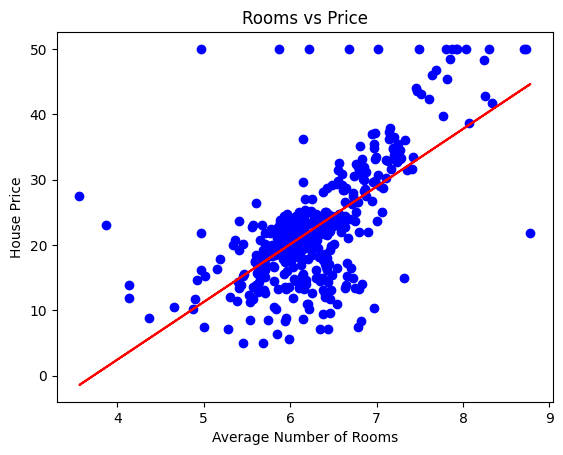

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# ボストンデータセットから部屋数のデータを抽出
X_rooms = boston.data[:,5].reshape(-1,1)
y_price = boston.target

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X_rooms, y_price, test_size=0.2, random_state=5)

# 線形回帰モデルを作成し、トレーニングデータを使ってモデルをトレーニング
model = LinearRegression()
model.fit(X_train, y_train)

# トレーニングデータと回帰直線をプロット
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')

plt.title('Rooms vs Price')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Price')
plt.show()

/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

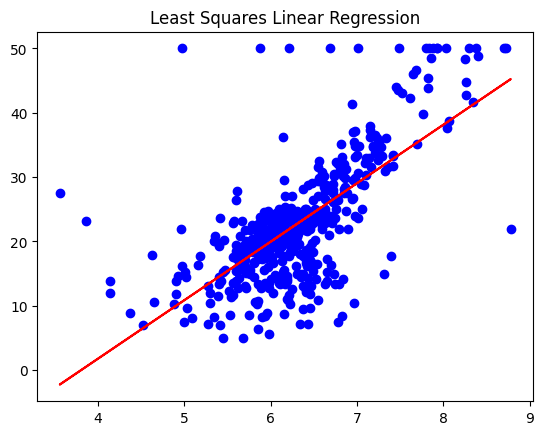

/tmp/ipykernel_898/3123291469.py:32: RuntimeWarning: overflow encountered in add
  cost = sum([data**2 for data in (y-y_current)]) / n
/tmp/ipykernel_898/3123291469.py:32: RuntimeWarning: overflow encountered in square
  cost = sum([data**2 for data in (y-y_current)]) / n
/tmp/ipykernel_898/3123291469.py:33: RuntimeWarning: overflow encountered in add
  m_gradient = -(2/n) * sum(X * (y - y_current))
/tmp/ipykernel_898/3123291469.py:35: RuntimeWarning: invalid value encountered in subtract
  m = m - (learning_rate * m_gradient)


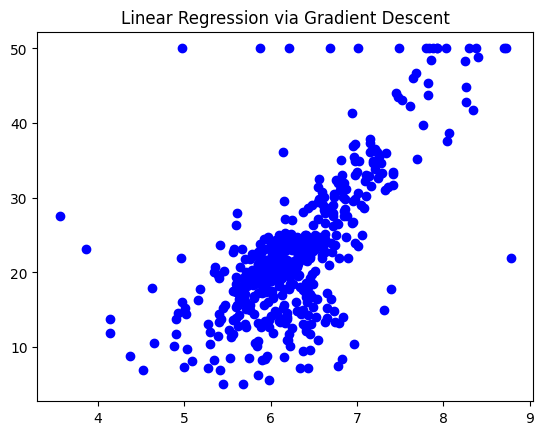

In [9]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
boston = load_boston()

# Use only the 'average number of rooms per dwelling' feature
X = boston.data[:, 5:6]
y = boston.target

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X, y)

# Plot the data and the model prediction
plt.scatter(X, y, color='blue')
plt.plot(X, lr.predict(X), color='red')
plt.title("Least Squares Linear Regression")
plt.show()

# Now, let's do the same with Gradient Descent

def gradient_descent(X, y, learning_rate = 0.04, iterations = 5000):
    m = 0
    b = 0
    n = float(len(X))
    
    for _ in range(iterations):
        y_current = (m * X) + b
        cost = sum([data**2 for data in (y-y_current)]) / n
        m_gradient = -(2/n) * sum(X * (y - y_current))
        b_gradient = -(2/n) * sum(y - y_current)
        m = m - (learning_rate * m_gradient)
        b = b - (learning_rate * b_gradient)
    
    return m, b

m, b = gradient_descent(X, y)

plt.scatter(X, y, color='blue')
plt.plot(X, m*X + b, color='green')
plt.title("Linear Regression via Gradient Descent")
plt.show()


Coefficients: 
 [5.86852789]


/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

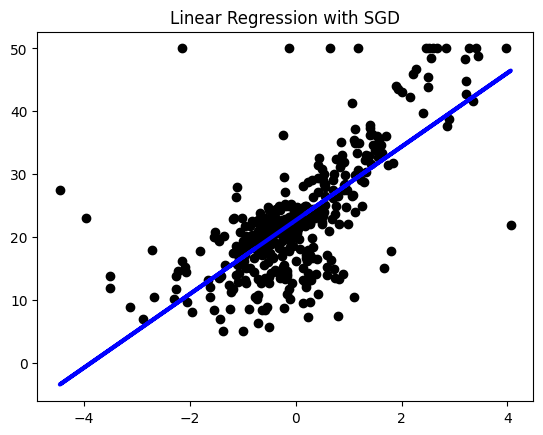

In [13]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
boston = load_boston()

# Use only the 'average number of rooms per dwelling' feature
X = boston.data[:, 5:6]
y = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# It's usually a good practice to scale the data for SGD
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a SGDRegressor object
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)

# Fit the model
sgd_reg.fit(X_train_scaled, y_train)

# Print the coefficients
print('Coefficients: \n', sgd_reg.coef_)

# Make predictions using the testing set
y_pred = sgd_reg.predict(X_test_scaled)

# Plot outputs
plt.scatter(X_test_scaled, y_test,  color='black')
plt.plot(X_test_scaled, y_pred, color='blue', linewidth=3)
plt.title("Linear Regression with SGD")
plt.show()

Coefficients: 
 [5.87002349]


/home/koumon/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

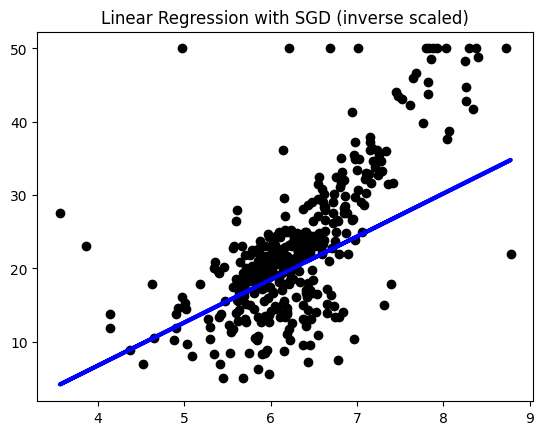

In [12]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
boston = load_boston()

# Use only the 'average number of rooms per dwelling' feature
X = boston.data[:, 5:6]
y = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# It's usually a good practice to scale the data for SGD
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a SGDRegressor object
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)

# Fit the model
sgd_reg.fit(X_train_scaled, y_train)

# Print the coefficients
print('Coefficients: \n', sgd_reg.coef_)

# Make predictions using the testing set
y_pred = sgd_reg.predict(X_test_scaled)

# Apply inverse scaling to X_test and predictions for plotting
X_test_inv_scaled = scaler.inverse_transform(X_test_scaled)
y_pred_inv_scaled = y_pred * scaler.scale_[0] + scaler.mean_[0]

# Plot outputs
plt.scatter(X_test_inv_scaled, y_test,  color='black')
plt.plot(X_test_inv_scaled, y_pred_inv_scaled, color='blue', linewidth=3)
plt.title("Linear Regression with SGD (inverse scaled)")
plt.show()